<a href="https://colab.research.google.com/github/himawant/IIIT-H-colab/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [15]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.17162914548535463


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [16]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34048257372654156
Validation accuracy using random classifier is  0.17206921764562516


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [17]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

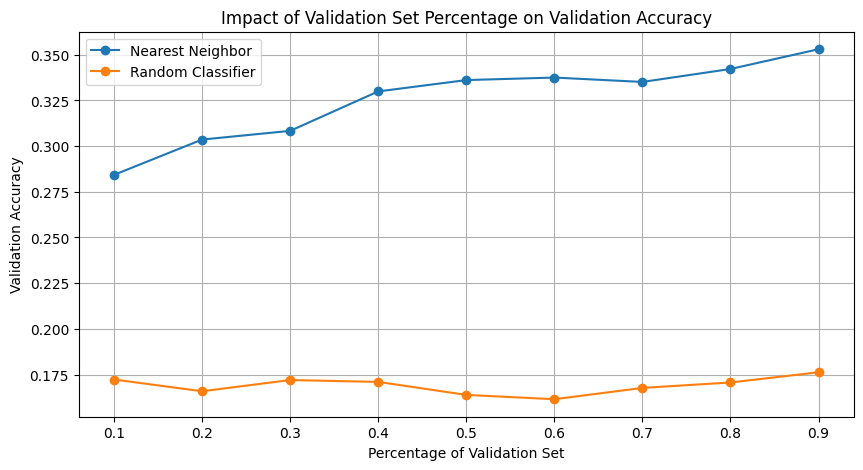

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions NN, RandomClassifier, Accuracy, and split as shown in your code

# Create an array of percentages for the validation set
validation_percentages = np.linspace(0.1, 0.9, 9)  # Vary from 10% to 90% in steps of 10%

# Initialize lists to store results
validation_accuracies_NN = []
validation_accuracies_random = []

for val_percentage in validation_percentages:
    # Split the data with the current validation percentage
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, val_percentage)

    # Calculate validation accuracy for nearest neighbor
    valpred_NN = NN(traindata, trainlabel, valdata)
    val_accuracy_NN = Accuracy(vallabel, valpred_NN)
    validation_accuracies_NN.append(val_accuracy_NN)

    # Calculate validation accuracy for random classifier
    valpred_random = RandomClassifier(traindata, trainlabel, valdata)
    val_accuracy_random = Accuracy(vallabel, valpred_random)
    validation_accuracies_random.append(val_accuracy_random)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(validation_percentages, validation_accuracies_NN, marker='o', label='Nearest Neighbor')
plt.plot(validation_percentages, validation_accuracies_random, marker='o', label='Random Classifier')
plt.xlabel('Percentage of Validation Set')
plt.ylabel('Validation Accuracy')
plt.title('Impact of Validation Set Percentage on Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1.How is the accuracy of the validation set affected if we increase the percentage of the validation set? What happens when we reduce it?

As the percentage of the validation set increases, the validation accuracy generally tends to increase initially. However, after a certain point, increasing the validation set size may not result in a significant improvement in validation accuracy. When we reduce the percentage of the validation set, the validation accuracy tends to decrease.

2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

The size of the train and validation sets affects our ability to predict the accuracy on the test set using the validation set. A larger validation set may provide a more reliable estimate of model performance on unseen data. Conversely, a smaller validation set may lead to higher variability in the estimated accuracy. It's important to strike a balance between having enough data for validation and retaining a sufficient amount for training.

3.What do you think is a good percentage to reserve for the validation set so that these two factors are balanced?

The choice of the percentage for the validation set depends on the size of the overall dataset and the desired trade-off between model evaluation reliability and the amount of data available for training. A common practice is to reserve around 20-30% of the data for the validation set. However, there is no one-size-fits-all answer, and it may vary depending on the specific dataset and problem. It's essential to experiment with different percentages, as shown in the graph, to find the right balance.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [19]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [20]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3383862590260799
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1. Yes, averaging the validation accuracy across multiple splits tends to give more consistent results. It helps reduce the impact of random variations that may occur in a single split, providing a more stable estimate of model performance.

2. It can provide a more accurate estimate of test accuracy compared to a single split. By averaging over multiple splits, the estimate becomes less dependent on the particular data split, which can lead to a more reliable assessment of how well the model generalizes to unseen data.

3. The number of iterations can have an effect on the estimate's stability and accuracy. In general, increasing the number of iterations can lead to a more stable estimate as it reduces the influence of randomness in the split. However, there may be diminishing returns, and at some point, the benefit of additional iterations may level off.

4. Increasing the number of iterations can help mitigate the impact of having a very small train or validation dataset to some extent. It provides a better chance of capturing the data's variability, but it cannot completely compensate for an extremely small dataset. The quality and representativeness of the data in each split still play a crucial role in obtaining meaningful estimates.